In [183]:
import csv
import torch
import matplotlib.pyplot as plt

In [184]:
file = open('linkedin_analytics_prediction.csv')
file_data = csv.reader(file)

data = []

next(file_data)
for row in file_data:
    values = []
    values.append(float(row[0]))
    values.append(float(row[1]))
    data.append(values)
data

[[932.0, 7.0],
 [673.0, 6.0],
 [1203.0, 10.0],
 [5994.0, 9.0],
 [949.0, 5.0],
 [1390.0, 12.0],
 [1408.0, 10.0],
 [1575.0, 4.0],
 [1263.0, 12.0],
 [1403.0, 10.0],
 [2598.0, 27.0],
 [1735.0, 10.0],
 [2096.0, 5.0],
 [1272.0, 18.0],
 [1846.0, 8.0],
 [4531.0, 38.0],
 [1495.0, 10.0],
 [1593.0, 9.0],
 [3738.0, 30.0],
 [1546.0, 11.0],
 [1381.0, 9.0],
 [1269.0, 6.0],
 [2108.0, 17.0],
 [953.0, 5.0],
 [3852.0, 30.0],
 [1125.0, 7.0],
 [1345.0, 9.0],
 [2089.0, 15.0],
 [2474.0, 15.0],
 [2136.0, 16.0],
 [2082.0, 15.0],
 [1696.0, 11.0],
 [8896.0, 49.0],
 [3359.0, 23.0],
 [1428.0, 14.0],
 [955.0, 3.0],
 [1648.0, 21.0],
 [1384.0, 30.0],
 [2169.0, 26.0],
 [1073.0, 14.0],
 [440.0, 0.0],
 [2090.0, 20.0],
 [1365.0, 23.0],
 [1659.0, 12.0],
 [1853.0, 23.0]]

In [185]:
x = torch.tensor([item[1] for item in data])
>>> x

tensor([ 7.,  6., 10.,  9.,  5., 12., 10.,  4., 12., 10., 27., 10.,  5., 18.,
         8., 38., 10.,  9., 30., 11.,  9.,  6., 17.,  5., 30.,  7.,  9., 15.,
        15., 16., 15., 11., 49., 23., 14.,  3., 21., 30., 26., 14.,  0., 20.,
        23., 12., 23.])

In [186]:
y = torch.tensor([item[0] for item in data])
>>> y

tensor([ 932.,  673., 1203., 5994.,  949., 1390., 1408., 1575., 1263., 1403.,
        2598., 1735., 2096., 1272., 1846., 4531., 1495., 1593., 3738., 1546.,
        1381., 1269., 2108.,  953., 3852., 1125., 1345., 2089., 2474., 2136.,
        2082., 1696., 8896., 3359., 1428.,  955., 1648., 1384., 2169., 1073.,
         440., 2090., 1365., 1659., 1853.])

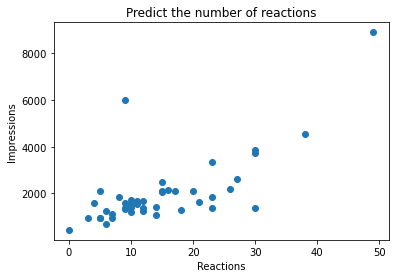

In [187]:
fig, ax = plt.subplots()
plt.title("Predict the number of reactions")
plt.xlabel("Reactions")
plt.ylabel("Impressions")
_ = ax.scatter(x, y)

Initialize the slope parameter $m$ with a "random" value of 0.9...  

(N.B.: In this simple demo, we could guess approximately-correct parameter values to start with. Or, we could use an algebraic (e.g., Moore-Penrose pseudoinverse) or statistical (e.g., ordinary-least-squares regression) to solve for the parameters quickly. This tiny machine learning demo with two parameters and eight data points scales, however, to millions of parameters and millions of data points. The other approaches -- guessing, algebra, statistics -- do not come close to scaling in this way.)

In [188]:
m = torch.tensor([0.9]).requires_grad_()
m

tensor([0.9000], requires_grad=True)

...and do the same for the $y$-intercept parameter $b$:

In [189]:
b = torch.tensor([0.1]).requires_grad_()
b

tensor([0.1000], requires_grad=True)

In [190]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

# this function will be used to calculate the regression line

In [212]:
def regression_plot(my_x, my_y, my_m, my_b):
    
    fig, ax = plt.subplots()

    ax.scatter(my_x, my_y)
    plt.title("Predict the number of reactions")
    plt.xlabel("Reactions")
    plt.ylabel("Impressions")
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()
    
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])
    
# this function is used to plot the regression line on the scatter plot

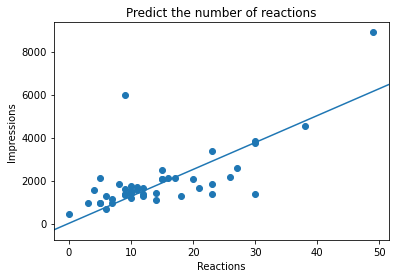

In [213]:
regression_plot(x, y, m, b)

In [193]:
yhat = regression(x,m,b)
yhat

# given the x value here are the predicted y values based on the current parameters m & b

tensor([ 6.4000,  5.5000,  9.1000,  8.2000,  4.6000, 10.9000,  9.1000,  3.7000,
        10.9000,  9.1000, 24.4000,  9.1000,  4.6000, 16.3000,  7.3000, 34.3000,
         9.1000,  8.2000, 27.1000, 10.0000,  8.2000,  5.5000, 15.4000,  4.6000,
        27.1000,  6.4000,  8.2000, 13.6000, 13.6000, 14.5000, 13.6000, 10.0000,
        44.2000, 20.8000, 12.7000,  2.8000, 19.0000, 27.1000, 23.5000, 12.7000,
         0.1000, 18.1000, 20.8000, 10.9000, 20.8000], grad_fn=<AddBackward0>)

Step 1: Forward pass

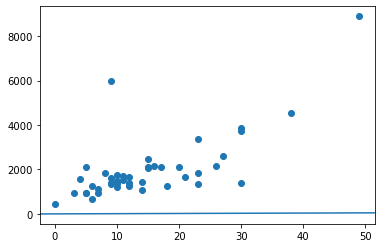

In [194]:
regression_plot(x, y, m, b)

Step 2: Compare $\hat{y}$ with true $y$ to calculate cost $C$

There is a PyTorch MSELoss method, but let's define it outselves to see how it works. MSE cost is defined by:

$C = \frac{1}{n} \sum_{i=1}^n (\hat{y_i}-y_i)^2$

In [195]:
def mse(my_yhat, my_y): 
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [196]:
C = mse(yhat, y)
C

tensor(6059951.5000, grad_fn=<DivBackward0>)

Step 3: Use autodiff to calculate gradient of $C$ w.r.t. parameters

In [197]:
C.backward()

In [198]:
m.grad

tensor([-78620.3203])

In [199]:
b.grad

tensor([-3976.3066])

Step 4: Gradient descent

In [200]:
optimizer = torch.optim.SGD([m, b], lr=0.00001)

In [201]:
optimizer.step()

In [202]:
m

tensor([1.6862], requires_grad=True)

In [203]:
b

tensor([0.1398], requires_grad=True)

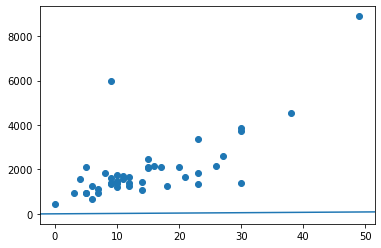

In [204]:
regression_plot(x, y, m, b)

In [205]:
C = mse(regression(x, m, b), y)
C

tensor(5998178., grad_fn=<DivBackward0>)

In [206]:
epochs = 1000
for epoch in range(epochs):
    
    optimizer.zero_grad() # Reset gradients to zero; else they accumulate
    
    yhat = regression(x, m, b) # Step 1
    C = mse(yhat, y) # Step 2
    
    C.backward() # Step 3
    optimizer.step() # Step 4
    
    print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

Epoch 0, cost 6e+06, m grad -7.81e+04, b grad -3.95e+03
Epoch 1, cost 5.94e+06, m grad -7.76e+04, b grad -3.93e+03
Epoch 2, cost 5.88e+06, m grad -7.71e+04, b grad -3.91e+03
Epoch 3, cost 5.82e+06, m grad -7.67e+04, b grad -3.88e+03
Epoch 4, cost 5.76e+06, m grad -7.62e+04, b grad -3.86e+03
Epoch 5, cost 5.7e+06, m grad -7.57e+04, b grad -3.84e+03
Epoch 6, cost 5.64e+06, m grad -7.52e+04, b grad -3.82e+03
Epoch 7, cost 5.59e+06, m grad -7.47e+04, b grad -3.79e+03
Epoch 8, cost 5.53e+06, m grad -7.43e+04, b grad -3.77e+03
Epoch 9, cost 5.48e+06, m grad -7.38e+04, b grad -3.75e+03
Epoch 10, cost 5.42e+06, m grad -7.33e+04, b grad -3.73e+03
Epoch 11, cost 5.37e+06, m grad -7.29e+04, b grad -3.71e+03
Epoch 12, cost 5.31e+06, m grad -7.24e+04, b grad -3.68e+03
Epoch 13, cost 5.26e+06, m grad -7.2e+04, b grad -3.66e+03
Epoch 14, cost 5.21e+06, m grad -7.15e+04, b grad -3.64e+03
Epoch 15, cost 5.16e+06, m grad -7.11e+04, b grad -3.62e+03
Epoch 16, cost 5.11e+06, m grad -7.06e+04, b grad -3.6e

Epoch 653, cost 1.14e+06, m grad -1.25e+03, b grad -340
Epoch 654, cost 1.14e+06, m grad -1.24e+03, b grad -339
Epoch 655, cost 1.14e+06, m grad -1.23e+03, b grad -339
Epoch 656, cost 1.14e+06, m grad -1.22e+03, b grad -339
Epoch 657, cost 1.14e+06, m grad -1.22e+03, b grad -338
Epoch 658, cost 1.14e+06, m grad -1.21e+03, b grad -338
Epoch 659, cost 1.14e+06, m grad -1.2e+03, b grad -338
Epoch 660, cost 1.14e+06, m grad -1.19e+03, b grad -337
Epoch 661, cost 1.14e+06, m grad -1.18e+03, b grad -337
Epoch 662, cost 1.14e+06, m grad -1.18e+03, b grad -336
Epoch 663, cost 1.14e+06, m grad -1.17e+03, b grad -336
Epoch 664, cost 1.14e+06, m grad -1.16e+03, b grad -336
Epoch 665, cost 1.14e+06, m grad -1.15e+03, b grad -335
Epoch 666, cost 1.14e+06, m grad -1.15e+03, b grad -335
Epoch 667, cost 1.14e+06, m grad -1.14e+03, b grad -335
Epoch 668, cost 1.14e+06, m grad -1.13e+03, b grad -334
Epoch 669, cost 1.14e+06, m grad -1.13e+03, b grad -334
Epoch 670, cost 1.14e+06, m grad -1.12e+03, b gra

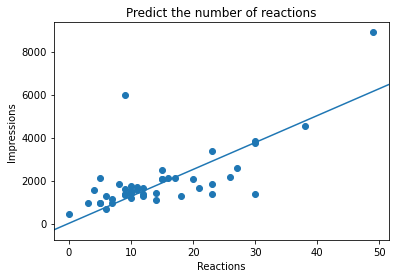

In [214]:
regression_plot(x,y,m,b)

In [208]:
m.item()

125.34070587158203

In [209]:
b.item()

8.764389991760254

In [210]:
def predict_reactions(my_x):
    return m*my_x + b

In [211]:
predict_reactions(80)

tensor([10036.0215], grad_fn=<AddBackward0>)